#  <span style='color:midnightblue'>  Multiple Regression Analysis on Survey Data  </span>



In [35]:
library(knitr)
library(skimr)
library(lm.beta)
library(MASS)

##  <span style='color:royalblue'>  1. Load dataset </span>

In [1]:
df <- read.csv("./hbat.csv", sep = ";", col.names = c("X1", "X2", "X3", "X4", "X5", "quality",
                                                      "ecommerce", "techsupport", "complaint_resolution",
                                                      "advertising", "product_line", "salesforce_image",
                                                      "pricing", "warranty", "new_products", "ordering",
                                                      "price_flexibility", "delivery_speed", "satisfaction",
                                                      "X20", "X21", "X22", "X23", "X24"))

##  <span style='color:royalblue'>  2. Inspect Dataframe </span>

In [3]:
head(df,5)

X1,X2,X3,X4,X5,quality,ecommerce,techsupport,complaint_resolution,advertising,...,new_products,ordering,price_flexibility,delivery_speed,satisfaction,X20,X21,X22,X23,X24
1,2,0,1,1,1,8.5,3.9,2.5,5.9,...,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,1
2,3,1,0,0,0,8.2,2.7,5.1,7.2,...,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,0
3,3,0,1,1,1,9.2,3.4,5.6,5.6,...,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,1
4,1,1,1,1,0,6.4,3.3,7.0,3.7,...,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,0
5,2,0,1,0,1,9.0,3.4,5.2,4.6,...,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,0


In [24]:
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             100   
Number of columns          14    
_______________________          
Column type frequency:           
  numeric                  14    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable        n_missing complete_rate  mean    sd    p0   p25   p50
 1 quality                      0             1  0.43 0.498   0    0     0   
 2 ecommerce                    0             1  7.81 1.40    5    6.57  8   
 3 techsupport                  0             1  3.67 0.701   2.2  3.27  3.6 
 4 complaint_resolution         0             1  5.36 1.53    1.3  4.25  5.4 
 5 advertising                  0             1  5.44 1.21    2.6  4.6   5.45
 6 product_line                 0             1  4.01 1.13    1.9  3.18  4   
 7 salesforce_image      

##  <span style='color:royalblue'>  3. Select variables </span>

In [7]:
df <- df[,-c(1:5, 20:24)]

##  <span style='color:royalblue'>  4. Fit and Inspect Linear Model </span>

In [27]:
model <- lm(satisfaction ~ ., df)
summary(model)


Call:
lm(formula = satisfaction ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57419 -0.03729  0.00426  0.06359  0.22030 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.264937   0.191983  -6.589 3.39e-09 ***
quality              -0.002947   0.029524  -0.100   0.9207    
ecommerce            -0.001179   0.011167  -0.106   0.9161    
techsupport          -0.035974   0.028433  -1.265   0.2092    
complaint_resolution  0.003375   0.013676   0.247   0.8057    
advertising           0.016237   0.021660   0.750   0.4555    
product_line         -0.007982   0.013249  -0.602   0.5485    
salesforce_image      0.488384   0.019064  25.619  < 2e-16 ***
pricing               0.050624   0.021117   2.397   0.0187 *  
warranty             -0.012050   0.010208  -1.180   0.2411    
new_products         -0.016993   0.026292  -0.646   0.5198    
ordering             -0.007047   0.008357  -0.843   0.4014    
price_flexibi

##  <span style='color:royalblue'>  5. Plot Linear Model </span>

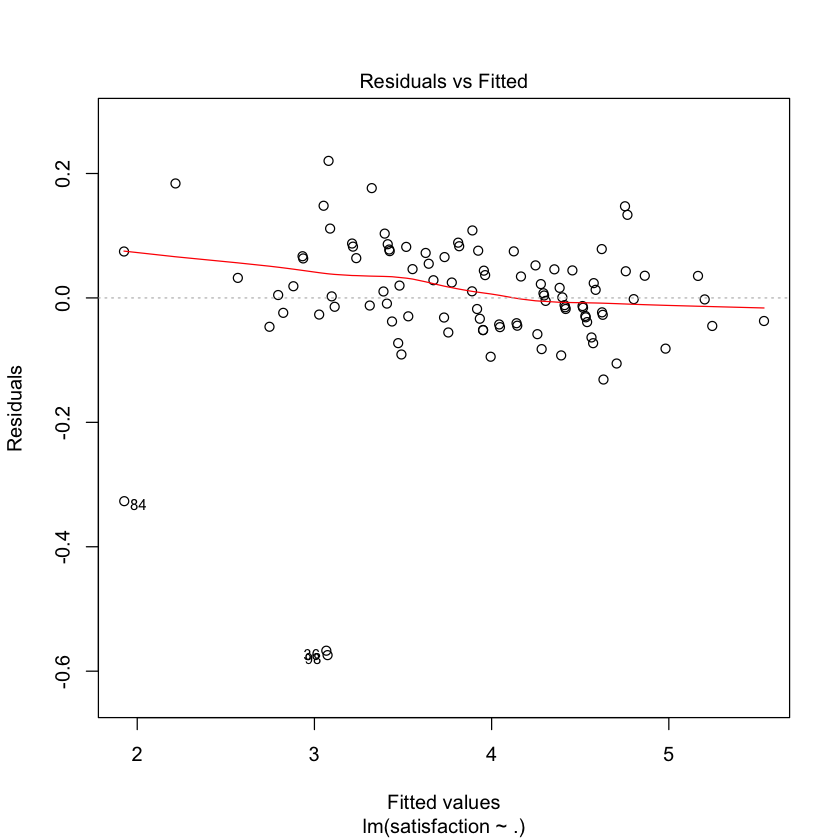

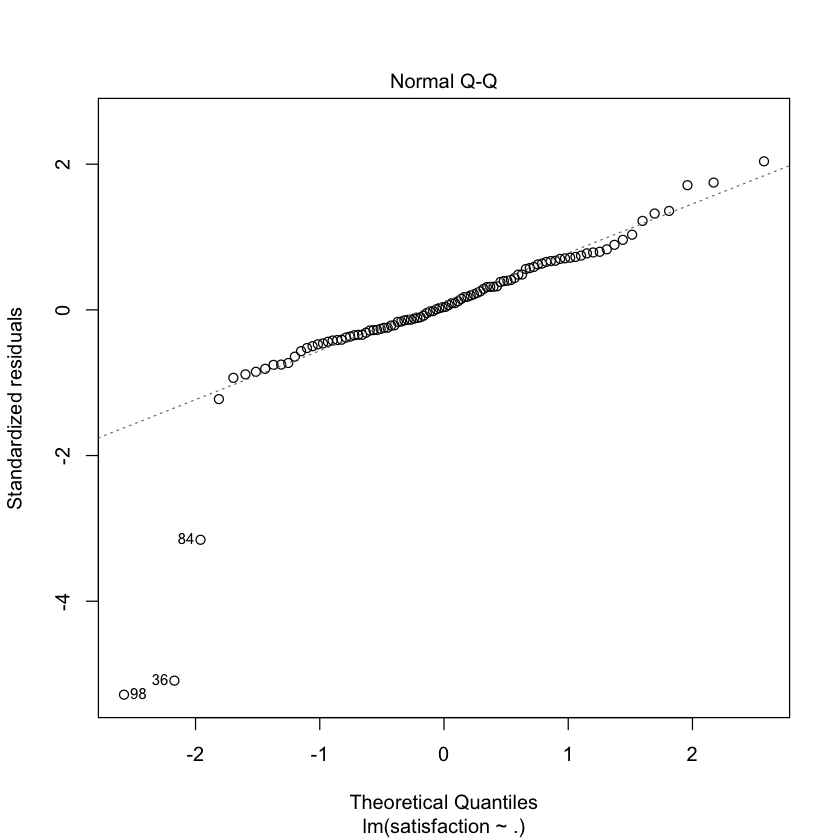

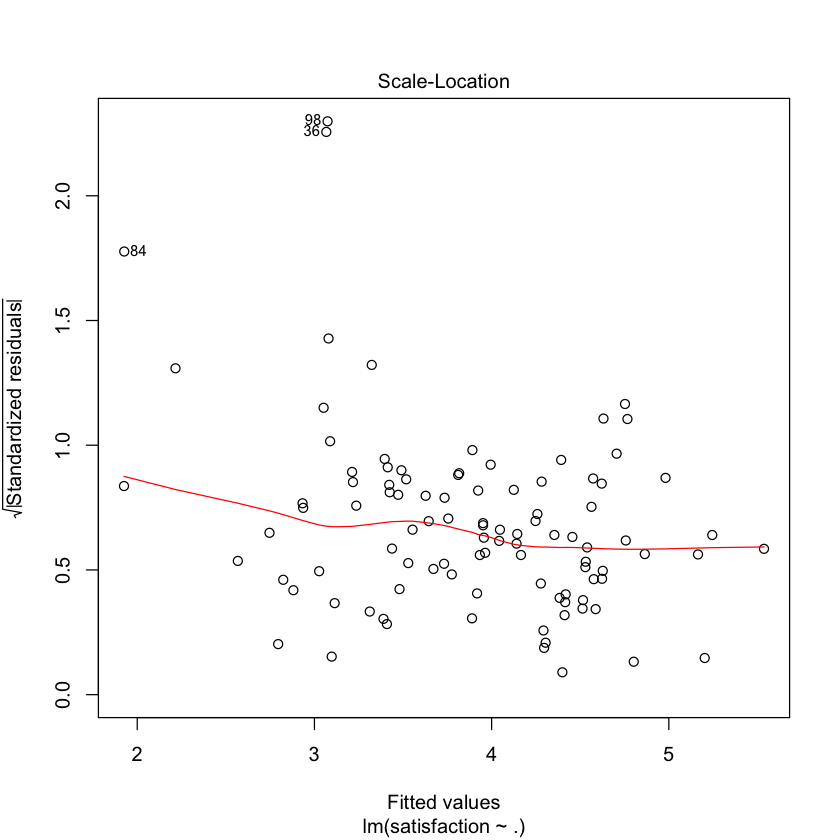

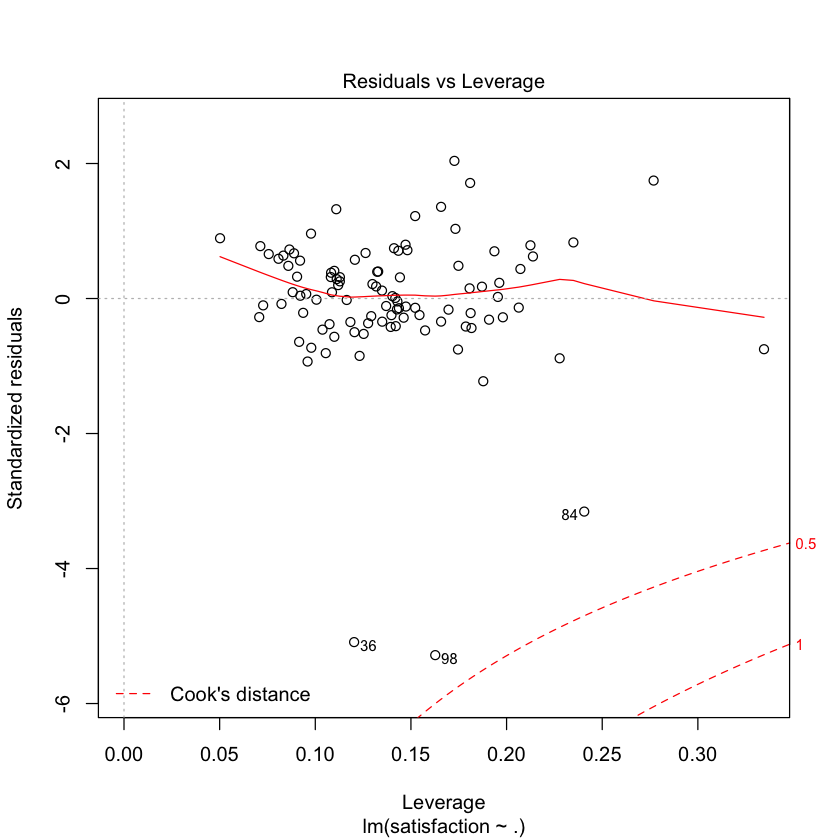

In [28]:
plot(model)

##  <span style='color:royalblue'>  6. Compute Standardized Betas </span>

> A **standardized beta coefficient** compares the strength of the effect of each individual independent variable to the dependent variable. The higher the absolute value of the beta coefficient, the stronger the effect. <br> For example, a beta of -.9 has a stronger effect than a beta of +.8. Standardized beta coefficients have standard deviations as their units. This means the variables can be easily compared to each other. <br> In other words, standardized beta coefficients are the coefficients that you would get if the variables in the regression were all converted to z-scores before running the analysis.

In [34]:
lm.beta(model)


Call:
lm(formula = satisfaction ~ ., data = df)

Standardized Coefficients::
         (Intercept)              quality            ecommerce 
         0.000000000         -0.001996797         -0.002242289 
         techsupport complaint_resolution          advertising 
        -0.034312836          0.007032294          0.026716071 
        product_line     salesforce_image              pricing 
        -0.012247166          0.874635455          0.073914482 
            warranty         new_products             ordering 
        -0.025349362         -0.018966372         -0.014325116 
   price_flexibility       delivery_speed 
         0.028039890          0.802443369 


##  <span style='color:royalblue'>  7. Fit Model with Stepwise Inclusion </span>

In [36]:
step.model <- stepAIC(model, direction = "both", trace = TRUE)

Start:  AIC=-413.17
satisfaction ~ quality + ecommerce + techsupport + complaint_resolution + 
    advertising + product_line + salesforce_image + pricing + 
    warranty + new_products + ordering + price_flexibility + 
    delivery_speed

                       Df Sum of Sq     RSS     AIC
- quality               1    0.0001  1.2135 -415.16
- ecommerce             1    0.0002  1.2136 -415.16
- complaint_resolution  1    0.0009  1.2143 -415.10
- product_line          1    0.0051  1.2185 -414.75
- new_products          1    0.0059  1.2193 -414.69
- advertising           1    0.0079  1.2213 -414.52
- ordering              1    0.0100  1.2234 -414.35
- price_flexibility     1    0.0146  1.2280 -413.98
- warranty              1    0.0197  1.2331 -413.57
- techsupport           1    0.0226  1.2360 -413.33
<none>                               1.2134 -413.17
- pricing               1    0.0811  1.2945 -408.71
- delivery_speed        1    6.8731  8.0865 -225.50
- salesforce_image      1    9.2


Step:  AIC=-424.49
satisfaction ~ salesforce_image + pricing + price_flexibility + 
    delivery_speed

                       Df Sum of Sq     RSS     AIC
<none>                               1.2973 -424.49
+ techsupport           1    0.0245  1.2728 -424.39
+ warranty              1    0.0219  1.2755 -424.19
- price_flexibility     1    0.0311  1.3285 -424.12
+ advertising           1    0.0206  1.2767 -424.09
+ ordering              1    0.0124  1.2849 -423.45
+ product_line          1    0.0060  1.2913 -422.95
+ new_products          1    0.0041  1.2933 -422.80
+ quality               1    0.0007  1.2967 -422.54
+ ecommerce             1    0.0000  1.2973 -422.49
+ complaint_resolution  1    0.0000  1.2973 -422.49
- pricing               1    0.0564  1.3537 -422.23
- delivery_speed        1   15.0225 16.3198 -173.28
- salesforce_image      1   19.4094 20.7067 -149.47


##  <span style='color:royalblue'>  4. Fit and Inspect New Linear Model </span>

Fitting a new model based on the model with the highest AIC above.

In [41]:
model2 <- lm(satisfaction ~ salesforce_image + pricing + price_flexibility + delivery_speed, df)

summary(model2)


Call:
lm(formula = satisfaction ~ salesforce_image + pricing + price_flexibility + 
    delivery_speed, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60552 -0.03616  0.00114  0.07175  0.17994 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.52312    0.09646 -15.790   <2e-16 ***
salesforce_image   0.49910    0.01324  37.700   <2e-16 ***
pricing            0.02387    0.01174   2.032   0.0449 *  
price_flexibility  0.02864    0.01897   1.510   0.1344    
delivery_speed     0.49176    0.01483  33.167   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1169 on 95 degrees of freedom
Multiple R-squared:  0.9757,	Adjusted R-squared:  0.9747 
F-statistic: 953.8 on 4 and 95 DF,  p-value: < 2.2e-16


The Adjusted R-squared improves compared to the one in the innitial model.